# Load Data

In [1]:
from recom_system.algorithms.io import get_ratings, get_books

ratings = get_ratings()
books = get_books()

In [3]:
# mean ratings
import numpy as np

books_with_ratings = np.unique(ratings.book_id)
print(f'{len(books)=} {len(books_with_ratings)=}')

len(books)=8475 len(books_with_ratings)=8452


In [7]:
# build data and label

data = books[books.id.isin(books_with_ratings)]
labels = []
for book_id in books_with_ratings:
    labels.append(ratings.loc[ratings.book_id == book_id, 'rating'].mean())
labels = np.array(labels)

In [8]:
labels = labels.round(0).astype(int)
print(f'{labels[:10]=}\n{labels.max()=}\n{labels.min()=}')

labels[:10]=array([3, 4, 4, 4, 4, 4, 4, 4, 4, 4])
labels.max()=5
labels.min()=0


In [9]:
index = labels != 0
data = data[index]
labels = labels[index]

<BarContainer object of 5 artists>

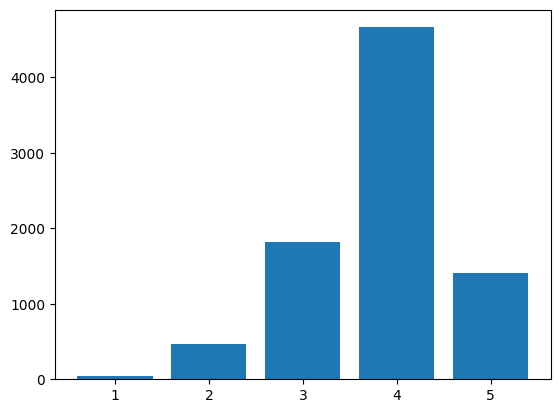

In [13]:
from matplotlib import pyplot as plt

lab, count = np.unique(labels, return_counts=True)
plt.bar(lab, count)

In [34]:
import json

features = data.vector.apply(json.loads)
features = np.array(features.to_list())
features

array([[-0.02236524,  0.0446007 , -0.01703515, ..., -0.03628001,
         0.04936349,  0.01600925],
       [-0.01925834,  0.09544671,  0.03581044, ...,  0.08353826,
         0.05405765, -0.04220512],
       [-0.03346099,  0.07280295, -0.07751514, ..., -0.00064888,
         0.013666  , -0.01249366],
       ...,
       [ 0.02658819, -0.00770496, -0.0204349 , ..., -0.06020261,
        -0.01054514, -0.05528771],
       [-0.0174621 , -0.05357287,  0.0314091 , ...,  0.05260606,
         0.05783745,  0.0404395 ],
       [ 0.03641284,  0.10452227,  0.03549685, ...,  0.10204758,
        -0.00515933, -0.04022478]])

In [35]:
# split into train & test set
from sklearn.model_selection import train_test_split

traindata, testdata, trainlabels, testlabels = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

# Classification
## Baseline

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


lr = LogisticRegression().fit(traindata, trainlabels)
pred = lr.predict(testdata)
accuracy = accuracy_score(testlabels, pred)
f1 = f1_score(testlabels, pred, average='micro')
cmatrix = confusion_matrix(testlabels, pred)

print(f'{accuracy=:.5f} {f1=:.5f}')
print(cmatrix)

accuracy=0.55238 f1=0.55238
[[   0    0    0   14    0]
 [   0    0    5  134    1]
 [   0    0   28  510    6]
 [   0    0   37 1350   12]
 [   0    0    8  401   14]]


## With PCA

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


clf = Pipeline([('std', StandardScaler()), ('pca', PCA(0.9)), ('lr', LogisticRegression(max_iter=500))])
clf.fit(traindata, trainlabels)

pred = clf.predict(testdata)
accuracy = accuracy_score(testlabels, pred)
f1 = f1_score(testlabels, pred, average='micro')
cmatrix = confusion_matrix(testlabels, pred)

print(f'{accuracy=:.5f} {f1=:.5f}')
print(cmatrix)

accuracy=0.53651 f1=0.53651
[[   0    0    1   12    1]
 [   1    0    4  131    4]
 [   3    1   35  493   12]
 [   9    1   59 1292   38]
 [   2    0   12  384   25]]


## NN with PCA

In [55]:
from sklearn.neural_network import MLPClassifier


clf = Pipeline([('std', StandardScaler()), ('pca', PCA(0.9)), ('mlp', MLPClassifier([100, 50]))])
clf.fit(traindata, trainlabels)

pred = clf.predict(testdata)
accuracy = accuracy_score(testlabels, pred)
f1 = f1_score(testlabels, pred, average='micro')
cmatrix = confusion_matrix(testlabels, pred)

print(f'{accuracy=:.5f} {f1=:.5f}')
print(cmatrix)

accuracy=0.44524 f1=0.44524
[[  0   0   4   8   2]
 [  1   2  23  96  18]
 [  3  11 109 359  62]
 [  6  29 239 944 181]
 [  0   7  68 281  67]]
